In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [0]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

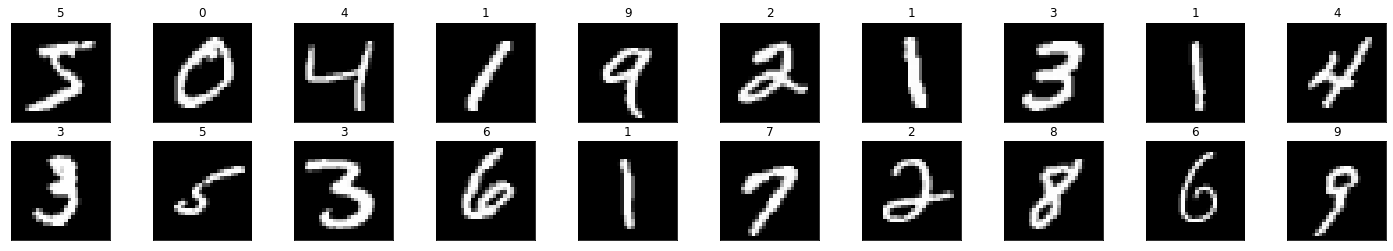

In [4]:
fig = plt.figure(figsize=(25, 4))

for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    ax.set_title(y[i])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=6000, test_size=1000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

params = [0.001, 0.01, 0.1, 1, 10, 100]

for c in params:   
    model = LogisticRegression(C=c, penalty="l1", solver='saga', tol=0.1)
    model.fit(X_train, y_train)
    sparsity = np.mean(model.coef_ == 0) * 100
    score = model.score(X_test, y_test)
    
    print("Sparsity with c={}: {}".format(c, sparsity))
    print("Score with c={}: {}".format(c, score))
    print("-"*15)

Sparsity with c=0.001: 99.97448979591836
Score with c=0.001: 0.166
---------------
Sparsity with c=0.01: 75.19132653061224
Score with c=0.01: 0.847
---------------
Sparsity with c=0.1: 28.15051020408163
Score with c=0.1: 0.88
---------------
Sparsity with c=1: 16.058673469387756
Score with c=1: 0.882
---------------
Sparsity with c=10: 15.433673469387754
Score with c=10: 0.882
---------------
Sparsity with c=100: 15.433673469387754
Score with c=100: 0.887
---------------


In [0]:
model = LogisticRegression(C=0.01, penalty="l1", solver='saga', tol=0.1)
model.fit(X_train, y_train)

coef = model.coef_.copy()

In [12]:
coef[0].shape

(784,)

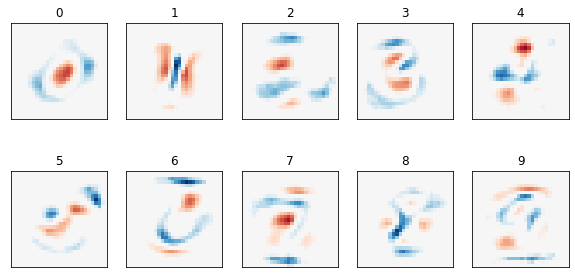

In [18]:
fig = plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    ax.set_title(i)